In [27]:
#!/usr/bin/env python

import numpy as np
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import os, warnings
from mpl_toolkits.mplot3d import Axes3D
from Py.const import *

def plot_le():
  # plot lyapunov exponents
  hist_ble = np.fromfile("data/ble.bin", np.float64)
  hist_fle = np.fromfile("data/fle.bin", np.float64)
  hist_fse = np.fromfile("data/fse.bin", np.float64)
  hist_ise = np.fromfile("data/ise.bin", np.float64)

  hist_ble = hist_ble.reshape((STEPS, DIMM))
  hist_fle = hist_fle.reshape((STEPS, DIMM))
  hist_fse = hist_fse.reshape((STEPS, DIMM))
  hist_ise = hist_ise.reshape((STEPS, DIMM))

  mean_ble = np.mean(hist_ble[STEPS//2:,:], axis=0)
  mean_fle = np.mean(hist_fle[STEPS//2:,:], axis=0)
  mean_fse = np.mean(hist_fse[STEPS//2:,:], axis=0)
  mean_ise = np.mean(hist_ise[STEPS//2:,:], axis=0)

  plt.rcParams["font.size"] = 12
  fig, ax1 = plt.subplots(1)
  ax1.set_title("Lyapunov exponents")
  ax1.plot(mean_ble, label="Backward Lyap.")
  ax1.plot(mean_fle, label="Forward Lyap.")
  ax1.plot(mean_fse, label="mean Singular")
  # ax1.plot(mean_ise, label="Initial Singular")
  ax1.set_ylabel("1 / Time")
  ax1.set_xlabel("LE index")
  ax1.legend()
  # plt.savefig("./image/true/le.png")
  plt.show()
  plt.clf()
  plt.close()


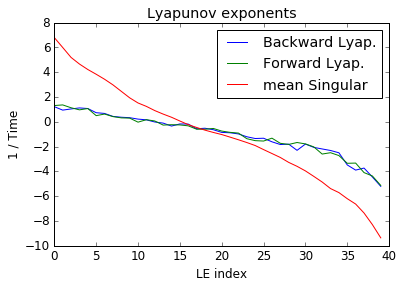

In [29]:
hist_true = np.fromfile("data/true.bin", np.float64)
hist_true = hist_true.reshape((STEPS, DIMM))
vectors = ["blv", "flv", "clv", "fsv", "isv"]
vector_name = {"blv": "Backward_LV", "flv": "Forward_LV", "clv": "Characteristic_LV", \
             "fsv": "Final_SV", "isv": "Initial_SV"}
hist_vector = {}
for vec in vectors:
    hist_vector[vec] = np.fromfile("data/%s.bin" % vec, np.float64)
    hist_vector[vec] = hist_vector[vec].reshape((STEPS, DIMM, DIMM))

os.system("mkdir -p image/true")

plot_le()